In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore') 

# Reading The data

In [2]:
df = pd.read_csv('.\chronic_kidney_disease.csv')

# Analyzing the data

In [3]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,0,0,1,1,121,...,44,7800,5.2,0,0,1,1,1,1,ckd
1,7,50,1.02,4,0,0,0,1,1,?,...,38,6000,0.0,1,1,1,1,1,1,ckd
2,62,80,1.01,2,3,0,0,1,1,423,...,31,7500,0.0,1,0,1,0,1,0,ckd
3,48,70,1.005,4,0,0,1,0,1,117,...,32,6700,3.9,0,1,1,0,0,0,ckd
4,51,80,1.01,2,0,0,0,1,1,106,...,35,7300,4.6,1,1,1,1,1,1,ckd


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    object 
 1   bp      400 non-null    object 
 2   sg      400 non-null    object 
 3   al      400 non-null    object 
 4   su      400 non-null    object 
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     400 non-null    object 
 10  bu      400 non-null    object 
 11  sc      400 non-null    object 
 12  sod     400 non-null    object 
 13  pot     400 non-null    object 
 14  hemo    400 non-null    object 
 15  pcv     400 non-null    int64  
 16  wbcc    400 non-null    int64  
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    int64  
 20  cad     400 non-null    int64  
 21  appet   400 non-null    int64  
 22  pe

# Database loading and pre-processing

In [5]:
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Create function for checking missing values which accepts a dataframe as its parameter
def null_values_check(df): 
    #Error handling to prevent abnormal termination of operation
    try:
        #if-else statement for null value check 
        if(df.isnull().values.any() == True):
            #if there are null values present, print a column-wise summary of records with null values
            print('Number of null records within each column:\n' + str(df.isnull().sum()))
        else:
            print('There is no missing values in the dataset.')
    
    except Exception as e:
        logging.error(e)

#initialise variable with dataset name
dataset_name = '.\chronic_kidney_disease.csv'

#error-handling to prevent abnormal termination of code
try:
    #import and load weather dataset into pandas dataframe
    chronic_kidney_disease_dataframe = pd.read_csv(dataset_name)
    
    #Description of Datasets
    #Print number of records and attributes of whole kidney dataset
    print('Shape of dataset: ' + str(chronic_kidney_disease_dataframe.shape))
    print('Total number of records in dataset = ' + str(chronic_kidney_disease_dataframe.shape[0]))
    print('Total number of attributes in dataset = ' + str(chronic_kidney_disease_dataframe.shape[1]))
    print('')
    #call function created to check for null values
    null_values_check(chronic_kidney_disease_dataframe)
    #Missing value imputation
    #replace ? to nan values 
    chronic_kidney_disease_dataframe = chronic_kidney_disease_dataframe.replace('?', np.nan)
    
    
    #set the features and the target variables
    target_class = chronic_kidney_disease_dataframe['class']
    print('\nAre there missing values in Target Class? ' + str(target_class.isna().any()))
    feature_classes = chronic_kidney_disease_dataframe.iloc[:, 0:24]
    print('\nAre there missing values in the Features? \n' + str(feature_classes.isna().any()))
    
    # replacing the null values
    #KNN imputation (n_neighbour = 5 means that the missing values will be replaced by the mean value of 5 nearest neighbors)
    knn_missing_values_imputer = KNNImputer(n_neighbors=5)
    feature_classes = pd.DataFrame(knn_missing_values_imputer.fit_transform(feature_classes),
                                   columns = feature_classes.columns)
    print('\nNow, Are there any missing values in Features? ' + str(feature_classes.isna().any()))
    
    
    #Scaling and normalization of features
    standard_feature_scaler = StandardScaler()
    feature_classes = standard_feature_scaler.fit_transform(feature_classes)
    feature_classes = pd.DataFrame(feature_classes, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 
                                                             'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                                             'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 
                                                             'cad', 'appet', 'pe', 'ane'])
    
    #Encoding target class using label encoding
    target_label_encoder = preprocessing.LabelEncoder()
    target_class = target_label_encoder.fit_transform(target_class)
    #target_class1 = pd.DataFrame(target_class, columns=['class'])
    
    X=feature_classes
    y=target_class
    
    #split the dataset into training and testing data using K Fold Approach
    kf = StratifiedKFold(n_splits=5, random_state=None)
    for train_index , test_index in kf.split(X,y):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]
        
    print('\nAfter Pre-processing:')
    print('Size of train dataset: ' + str(X_train.shape[0]))
    print('Size of test dataset: ' + str(y_test.shape[0]))
                                                      
except FileNotFoundError as e:
    logging.error(e)

Shape of dataset: (400, 25)
Total number of records in dataset = 400
Total number of attributes in dataset = 25

There is no missing values in the dataset.

Are there missing values in Target Class? False

Are there missing values in the Features? 
age       True
bp        True
sg        True
al        True
su        True
rbc      False
pc       False
pcc      False
ba       False
bgr       True
bu        True
sc        True
sod       True
pot       True
hemo      True
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
pe       False
ane      False
dtype: bool

Now, Are there any missing values in Features? age      False
bp       False
sg       False
al       False
su       False
rbc      False
pc       False
pcc      False
ba       False
bgr      False
bu       False
sc       False
sod      False
pot      False
hemo     False
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
p

# Converting each column to float data type

In [6]:
# taking the length of the column and converting the each column to float
colLength = (len(chronic_kidney_disease_dataframe.axes[1]))

# for storing the position of each column
count=0;

for i in chronic_kidney_disease_dataframe:
    count += 1
    # the last column of the data set is label so when we reach last column just break the loop
    if(count==25):
        break
    
    # converting each column to float data type
    
    chronic_kidney_disease_dataframe[i] = chronic_kidney_disease_dataframe[i].astype('float64')

In [7]:
chronic_kidney_disease_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     400 non-null    float64
 6   pc      400 non-null    float64
 7   pcc     400 non-null    float64
 8   ba      400 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     400 non-null    float64
 16  wbcc    400 non-null    float64
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    float64
 19  dm      400 non-null    float64
 20  cad     400 non-null    float64
 21  appet   400 non-null    float64
 22  pe

In [8]:
chronic_kidney_disease_dataframe['class'].value_counts()
chronic_kidney_disease_dataframe['class'] = chronic_kidney_disease_dataframe['class'].replace(to_replace={'ckd\t':'ckd'})
chronic_kidney_disease_dataframe["class"] = [1 if i == "ckd" else 0 for i in chronic_kidney_disease_dataframe["class"]]
features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
           'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
           'appet', 'pe', 'ane']

# Filling empty cell or null values with median

In [9]:
for feature in features:
    chronic_kidney_disease_dataframe[feature] = chronic_kidney_disease_dataframe[feature].fillna(chronic_kidney_disease_dataframe[feature].median())

# Checking For Null Values

In [10]:
chronic_kidney_disease_dataframe.isnull().any().sum()

0

# Mutual Information Feature Selection

In [11]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.1000133 , 0.15786493, 0.35419311, 0.34250525, 0.10403339,
       0.08155245, 0.14644163, 0.04342545, 0.        , 0.1568683 ,
       0.18434   , 0.34510916, 0.25226792, 0.16314451, 0.43216249,
       0.42753576, 0.1195866 , 0.3960982 , 0.22667679, 0.19255957,
       0.01321596, 0.13318706, 0.14944332, 0.02487109])

In [12]:
# converting to pandas series
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

hemo     0.432162
pcv      0.427536
rbcc     0.396098
sg       0.354193
sc       0.345109
al       0.342505
sod      0.252268
htn      0.226677
dm       0.192560
bu       0.184340
pot      0.163145
bp       0.157865
bgr      0.156868
pe       0.149443
pc       0.146442
appet    0.133187
wbcc     0.119587
su       0.104033
age      0.100013
rbc      0.081552
pcc      0.043425
ane      0.024871
cad      0.013216
ba       0.000000
dtype: float64

<AxesSubplot: xlabel='Features', ylabel='mutual_info'>

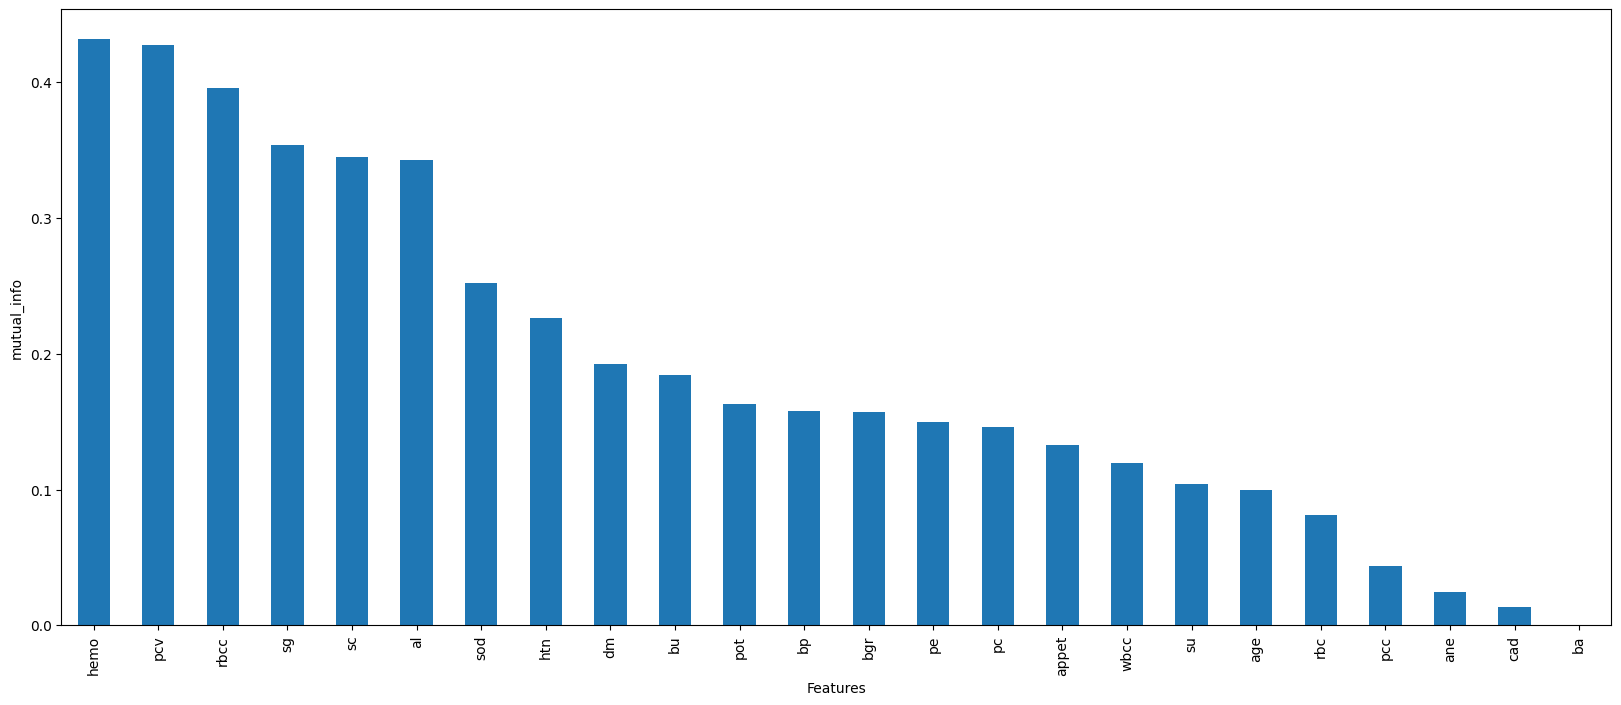

In [13]:
mutual_info.sort_values(ascending=False).plot.bar(xlabel="Features",ylabel="mutual_info",figsize=(20, 8))

In [14]:
# Independent and Dependent Feature:
X = chronic_kidney_disease_dataframe.iloc[:, :-1]
y = chronic_kidney_disease_dataframe.iloc[:, -1]

# Function for calling classifier and splitting of dataset into traning and testing and selecting the best feature from the Mutual Information

In [15]:
# selecting the top feature
from sklearn.feature_selection import SelectKBest
def selectFeature(n):
    sel_five_cols = SelectKBest(mutual_info_classif, k=n)
    sel_five_cols.fit(X_train, y_train)
    return X_train.columns[sel_five_cols.get_support()]

# for selecting all the details of the dataset based on the selected top feature
# chronic_kidney_disease_dataframe[['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']]
dataset=[]
def topFeature(feature):
    dataset=[]
    topFeature = []
    for i in feature:
        topFeature.append(i)
    dataset.append(topFeature)
    return dataset

  
# function for creating the final model
def numberOfFeatureForClassifier(number):
    selectedFeature = selectFeature(number)
    feature =[]
    for i in selectedFeature:
        # appending the selected feature into a list
        feature.append(i)

    selectedDataSetForTraining = topFeature(feature)
    
    # calling the classifier function
    return randomForestClassifier(selectedDataSetForTraining,feature,number)
    



 # Random Forest Classifier

In [16]:
# Random Forest classifier function
from sklearn.ensemble import RandomForestClassifier

def randomForestClassifier(selectedDataSetForTraining,feature,number):
    
    # printing the top feature
    print("Using Random Forest Classification")
    print(f"The top {number} features are: ")
    print(feature)
    print()
    
    # Splitting of dataset using K Fold Validation Approach:
    
    X = chronic_kidney_disease_dataframe[selectedDataSetForTraining[0]]
    k = 5  
    print(X.head())
    kf = StratifiedKFold(n_splits=k, random_state=None)
    for train_index , test_index in kf.split(X,y):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]

    
    # RandomForestClassifier:
    RandomForest = RandomForestClassifier()   
    RandomForest = RandomForest.fit(X_train,y_train)
    
    return RandomForest

    

## Storing the final model in a variable

In [17]:
model = numberOfFeatureForClassifier(7)

Using Random Forest Classification
The top 7 features are: 
['sg', 'al', 'sc', 'sod', 'hemo', 'pcv', 'rbcc']

      sg   al   sc    sod  hemo   pcv  rbcc
0  1.020  1.0  1.2  138.0  15.4  44.0   5.2
1  1.020  4.0  0.8  138.0  11.3  38.0   0.0
2  1.010  2.0  1.8  138.0   9.6  31.0   0.0
3  1.005  4.0  3.8  111.0  11.2  32.0   3.9
4  1.010  2.0  1.4  138.0  11.6  35.0   4.6


## Deploying model on local server

In [ ]:
# importing libararies and modules
from flask import Flask, jsonify, request
from flask_cors import CORS, cross_origin


# creating an app
app = Flask(__name__)


#create endpoints
@app.route('/',methods=['GET'])
@cross_origin()
def home():
    return jsonify({ 'error' : "wrong endpoint"})


@app.route('/result',methods=['POST'])
@cross_origin()
def result():
    if request.method=='POST':
        print(request.json)
        sg = float(request.json['sg'])
        al = float(request.json['al'])
        sc = float(request.json['sc'])
        sod = float(request.json['sod'])
        hemo = float(request.json['hemo'])
        pcv = float(request.json['pcv'])
        rbcc = float(request.json['rbcc'])
        values = np.array([[sg,al,sc,sod,hemo,pcv,rbcc]])
        prediction = model.predict(values)
        result = True if prediction[0]==1 else False
        return jsonify({'result' : result})


if __name__== '__main__':
    app.run(debug=True,use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [27/Nov/2023 13:58:01] "OPTIONS /result HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2023 13:58:01] "POST /result HTTP/1.1" 500 -


{'sg': '', 'al': '', 'sc': '', 'sod': '', 'hemo': '', 'pcv': '', 'rbcc': ''}


Traceback (most recent call last):
  File "C:\ProgramData\Python310\lib\site-packages\flask\app.py", line 1478, in __call__
    return self.wsgi_app(environ, start_response)
  File "C:\ProgramData\Python310\lib\site-packages\flask\app.py", line 1458, in wsgi_app
    response = self.handle_exception(e)
  File "C:\ProgramData\Python310\lib\site-packages\flask\app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Python310\lib\site-packages\flask\app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Python310\lib\site-packages\flask\app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Python310\lib\site-packages\flask\app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "C:\ProgramData\Python310\lib\site-packages\flask_cors\decorator.py", line 130, in wrapped_function
    resp =

{'sg': '', 'al': '', 'sc': '', 'sod': '', 'hemo': '', 'pcv': '', 'rbcc': ''}


Traceback (most recent call last):
  File "C:\ProgramData\Python310\lib\site-packages\flask\app.py", line 1478, in __call__
    return self.wsgi_app(environ, start_response)
  File "C:\ProgramData\Python310\lib\site-packages\flask\app.py", line 1458, in wsgi_app
    response = self.handle_exception(e)
  File "C:\ProgramData\Python310\lib\site-packages\flask\app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Python310\lib\site-packages\flask\app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Python310\lib\site-packages\flask\app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Python310\lib\site-packages\flask\app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "C:\ProgramData\Python310\lib\site-packages\flask_cors\decorator.py", line 130, in wrapped_function
    resp =

{'sg': '1', 'al': '1', 'sc': '1', 'sod': '1', 'hemo': '1', 'pcv': '1', 'rbcc': '1'}


127.0.0.1 - - [27/Nov/2023 14:04:39] "OPTIONS /result HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2023 14:04:39] "POST /result HTTP/1.1" 200 -


{'sg': '1', 'al': '1', 'sc': '1', 'sod': '1', 'hemo': '1', 'pcv': '1', 'rbcc': '1'}


127.0.0.1 - - [27/Nov/2023 14:04:44] "POST /result HTTP/1.1" 200 -


{'sg': '1', 'al': '1', 'sc': '1', 'sod': '1', 'hemo': '0', 'pcv': '1', 'rbcc': '1'}


127.0.0.1 - - [27/Nov/2023 14:04:52] "OPTIONS /result HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2023 14:04:52] "POST /result HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2023 14:04:52] "POST /result HTTP/1.1" 200 -


{'sg': '1', 'al': '0', 'sc': '1', 'sod': '1', 'hemo': '0', 'pcv': '1', 'rbcc': '1'}
{'sg': '1', 'al': '0', 'sc': '1', 'sod': '1', 'hemo': '0', 'pcv': '1', 'rbcc': '1'}


127.0.0.1 - - [27/Nov/2023 14:04:55] "POST /result HTTP/1.1" 200 -


{'sg': '0', 'al': '0', 'sc': '1', 'sod': '1', 'hemo': '0', 'pcv': '1', 'rbcc': '1'}


127.0.0.1 - - [27/Nov/2023 14:04:57] "OPTIONS /result HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2023 14:04:57] "POST /result HTTP/1.1" 200 -


{'sg': '0', 'al': '0', 'sc': '1', 'sod': '1', 'hemo': '0', 'pcv': '0', 'rbcc': '1'}


127.0.0.1 - - [27/Nov/2023 14:04:59] "POST /result HTTP/1.1" 200 -


{'sg': '0', 'al': '0', 'sc': '1', 'sod': '1', 'hemo': '0', 'pcv': '0', 'rbcc': '0'}


127.0.0.1 - - [27/Nov/2023 14:05:01] "POST /result HTTP/1.1" 200 -


{'sg': '0', 'al': '0', 'sc': '1', 'sod': '0', 'hemo': '0', 'pcv': '0', 'rbcc': '0'}


127.0.0.1 - - [27/Nov/2023 14:05:04] "OPTIONS /result HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2023 14:05:04] "POST /result HTTP/1.1" 200 -


{'sg': '0', 'al': '0', 'sc': '0', 'sod': '0', 'hemo': '0', 'pcv': '0', 'rbcc': '0'}


127.0.0.1 - - [27/Nov/2023 14:06:02] "OPTIONS /result HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2023 14:06:03] "POST /result HTTP/1.1" 200 -


{'sg': '1.025', 'al': '0', 'sc': '1.1', 'sod': '142', 'hemo': '15.6', 'pcv': '44', 'rbcc': '6.3'}


127.0.0.1 - - [27/Nov/2023 14:14:40] "OPTIONS /result HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2023 14:14:41] "POST /result HTTP/1.1" 200 -


{'sg': '1', 'al': '1', 'sc': '1', 'sod': '1', 'hemo': '1', 'pcv': '1', 'rbcc': '1'}


127.0.0.1 - - [27/Nov/2023 14:15:44] "OPTIONS /result HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2023 14:15:44] "POST /result HTTP/1.1" 200 -


{'sg': '1', 'al': '1', 'sc': '1', 'sod': '1', 'hemo': '1', 'pcv': '1', 'rbcc': '1'}


127.0.0.1 - - [27/Nov/2023 14:16:55] "OPTIONS /result HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2023 14:16:56] "POST /result HTTP/1.1" 200 -


{'sg': '1', 'al': '1', 'sc': '0', 'sod': '2', 'hemo': '2', 'pcv': '2', 'rbcc': '2'}


127.0.0.1 - - [27/Nov/2023 14:21:28] "OPTIONS /result HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2023 14:21:28] "POST /result HTTP/1.1" 200 -


{'sg': '1', 'al': '1', 'sc': '2', 'sod': '2', 'hemo': '2', 'pcv': '2', 'rbcc': '2'}


127.0.0.1 - - [27/Nov/2023 14:24:10] "OPTIONS /result HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2023 14:24:10] "POST /result HTTP/1.1" 200 -


{'sg': '1.005', 'al': '4', 'sc': '1', 'sod': '139', 'hemo': '14', 'pcv': '40', 'rbcc': '5'}


127.0.0.1 - - [27/Nov/2023 14:28:40] "OPTIONS /result HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2023 14:28:40] "POST /result HTTP/1.1" 200 -


{'sg': '1.025', 'al': '0', 'sc': '1.1', 'sod': '142', 'hemo': '15.6', 'pcv': '44', 'rbcc': '6.3'}
